# Exercise 5
In the Data Normalisation example in the 02-kNN Notebook replace the N(0,1) scaler with a min-max scaler.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
athlete = pd.read_csv('data/AthleteSelection.csv', index_col = 'Athlete')
athlete.head()

,Speed,Agility,Selected
Athlete,,,
x1,2.50,6.00,No
x2,3.75,8.00,No
x3,2.25,5.50,No
x4,3.25,8.25,No
x5,2.75,7.50,No


In [3]:
names = athlete.index
names

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
      dtype='object', name='Athlete')

In [4]:
# Store features and labels in numpy arrays X and y
y = athlete.pop('Selected').values
X = athlete.values
q = [5.0,7.5]
X[0]

array([2.5, 6. ])

In [5]:
athlete

,Speed,Agility
Athlete,,
x1,2.50,6.00
x2,3.75,8.00
x3,2.25,5.50
x4,3.25,8.25
x5,2.75,7.50
x6,4.50,5.00
x7,3.50,5.25
x8,3.00,3.25
x9,4.00,4.00


## Plot the Dataset

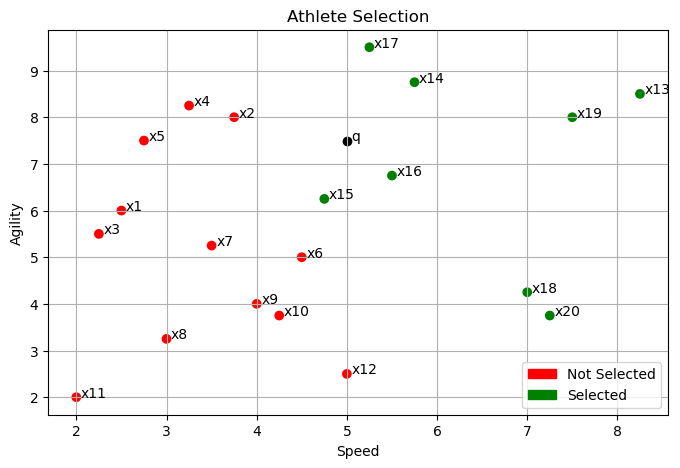

In [6]:
color= ['red' if l == 'No' else 'green' for l in y]
x1 = X[:,0]
x2 = X[:,1]
plt.figure(figsize=(8,5))
plt.scatter(x1,x2, color=color)
plt.scatter(q[0],q[1],color='black')
plt.annotate('q',(q[0]+0.05,q[1]))
plt.title("Athlete Selection")
plt.xlabel("Speed")
plt.ylabel("Agility")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Not Selected')
blue_patch = mpatches.Patch(color='green', label='Selected')
plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (x1[i]+0.05, x2[i]))

## Data Normalisation

### MinMax Scaling
Instead of applying the Standard scaler, like we did in notebook *02-kNN* lets now apply MinMax scaling.

In [7]:
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)
q_scaled = scaler.transform([q])
q_scaled

array([[0.48      , 0.73333333]])

Plot the scaled data.

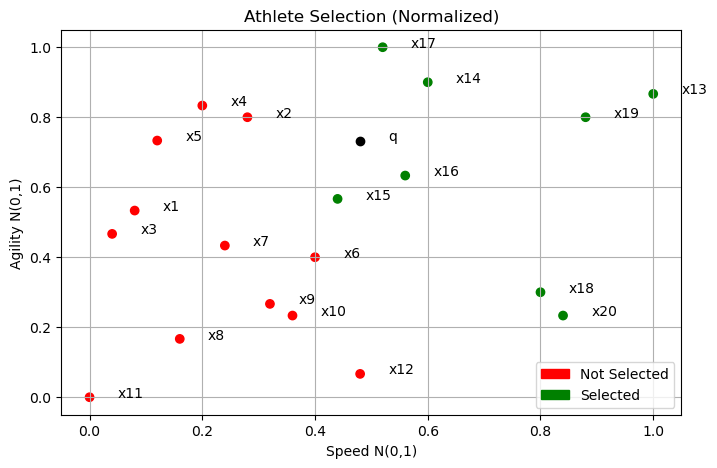

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color= ['red' if l == 'No' else 'green' for l in y]
x1 = X_scaled[:,0]
x2 = X_scaled[:,1]
plt.figure(figsize=(8,5))
plt.scatter(x1,x2, color=color)
plt.scatter(q_scaled[0,0],q_scaled[0,1],color='black')
plt.annotate('q',(q_scaled[0,0]+0.05,q_scaled[0,1]))
plt.title("Athlete Selection (Normalized)")
plt.xlabel("Speed N(0,1)")
plt.ylabel("Agility N(0,1)")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Not Selected')
blue_patch = mpatches.Patch(color='green', label='Selected')
plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (x1[i]+0.05, x2[i]))

Lets now train a 2-NN classifier on this scaled data.

In [9]:
athlete_neigh = NearestNeighbors(n_neighbors=2, radius=0.4)
athlete_neigh.fit(X_scaled)

NearestNeighbors(n_neighbors=2, radius=0.4)

In [10]:
# Find x nearest neighbours for X4
x4 = X_scaled[3]
athlete_neigh.kneighbors([x4], 2, return_distance=True)

(array([[0.        , 0.08666667]]), array([[3, 1]]))

In [11]:
# Find nearest neighbours for X4 within a radius 
athlete_neigh.radius_neighbors([x4], 1.0, return_distance=True)

(array([array([0.32310989, 0.08666667, 0.40005555, 0.        , 0.12806248,
               0.4772607 , 0.40199502, 0.66786559, 0.57923321, 0.62096699,
               0.85699734, 0.81619714, 0.80069414, 0.4055175 , 0.35876331,
               0.41182521, 0.36080158, 0.80277297, 0.6808165 , 0.87726849])],
       dtype=object),
 array([array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
               17, 18, 19])                                                       ],
       dtype=object))

In [12]:
# Find three nearest neighbours for q
q = [5.0,7.5]
q3n = athlete_neigh.kneighbors([q], 3)[1][0]
# q3n contains the 'index' of the nearest neighbours
for n in q3n:
    print(names[n])

x13
x19
x17
